In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
dkm = pd.read_csv(r'DKM_FULL.csv')

### The null is there and i have to find down anh check it
#### Let check about which columns is have null and go replace that place.

In [3]:
dkm.isnull().sum()

NGÀY           0
BIỂN SỐ        0
CHỦ XE         0
LIÊN HỆ        0
LOẠI XE       88
NHÃN HIỆU      0
MẪU XE         0
SỐ VIN         0
SỐ MÁY         0
TỈNH THÀNH     0
QUẬN HUYỆN     0
PHÂN KHÚC      0
Month          0
Year           0
Quarter        0
dtype: int64

##### So we can see that col LOAI XE have 88 null value. With me, that' not necessary for analys so i decide to leave them out by using choose columnn

In [4]:
df1 = pd.DataFrame(data=dkm, columns=['Year','Month','Quarter','NHÃN HIỆU', 'MẪU XE', 'TỈNH THÀNH','QUẬN HUYỆN'])
df1.head(5)

,Year,Month,Quarter,NHÃN HIỆU,MẪU XE,TỈNH THÀNH,QUẬN HUYỆN
0,2017,1,1,BMW,320I,Hồ Chí Minh,Tân Phú
1,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Phú Nhuận
2,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Hóc Môn
3,2017,1,1,AUDI,A4,Hồ Chí Minh,Tân Phú
4,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Gò Vấp


##### Apply a cols that count the number of Vin number but first i will try myself to rename the cols/

In [5]:
df1.rename(columns={'NHÃN HIỆU':'Carmake',
                   'MẪU XE': 'Carmodel',
                   'TỈNH THÀNH':'Prov',
                   'QUẬN HUYỆN':'Dic'},
          inplace = True)
df1.columns

Index(['Year', 'Month', 'Quarter', 'Carmake', 'Carmodel', 'Prov', 'Dic'], dtype='object')

#### So I have success to change the name of Columns , It's just a lil step that remind me cant remember the thing although it smallest /n let add one more columns that count every single row to show the number of VIN has registration

In [6]:
df1['count'] = float(1)
df1.head(5)

,Year,Month,Quarter,Carmake,Carmodel,Prov,Dic,count
0,2017,1,1,BMW,320I,Hồ Chí Minh,Tân Phú,1.0
1,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Phú Nhuận,1.0
2,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Hóc Môn,1.0
3,2017,1,1,AUDI,A4,Hồ Chí Minh,Tân Phú,1.0
4,2017,1,1,MERCEDES-BENZ,C250,Hồ Chí Minh,Gò Vấp,1.0


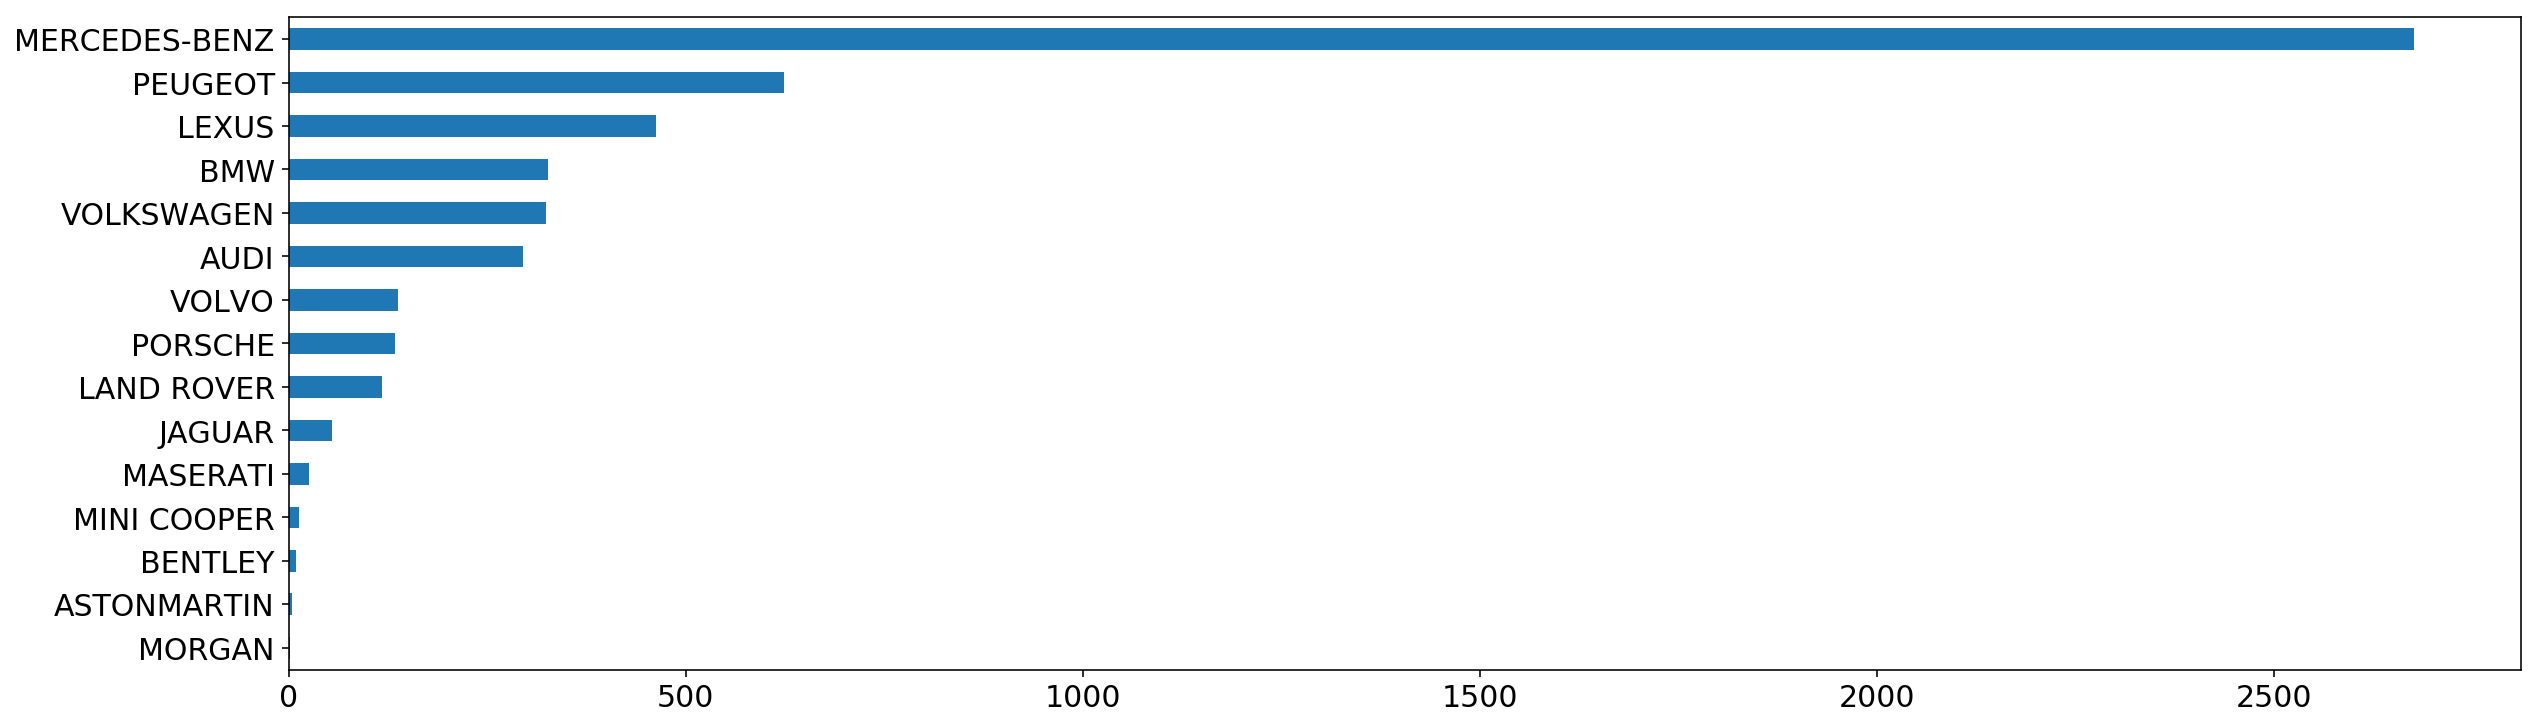

In [7]:
%config InlineBackend.figure_formats = ["retina"]
carmake_reg = df1.Carmake.value_counts().sort_values(ascending = True)
carmake_reg.plot(kind = 'barh',figsize = (20,6),fontsize=15)
plt.show()

In [28]:
month_reg = df1.pivot_table(index='Month',values='count',columns='Year',aggfunc=np.sum,fill_value=0)
month_reg

Year,2017,2018,2019,2020
Month,,,,
1,218,184,332,190
2,71,152,63,0
3,140,114,122,0
4,1,115,156,0
5,247,59,152,0
6,291,158,142,0
7,213,169,182,0
8,125,181,124,0
9,108,158,182,0


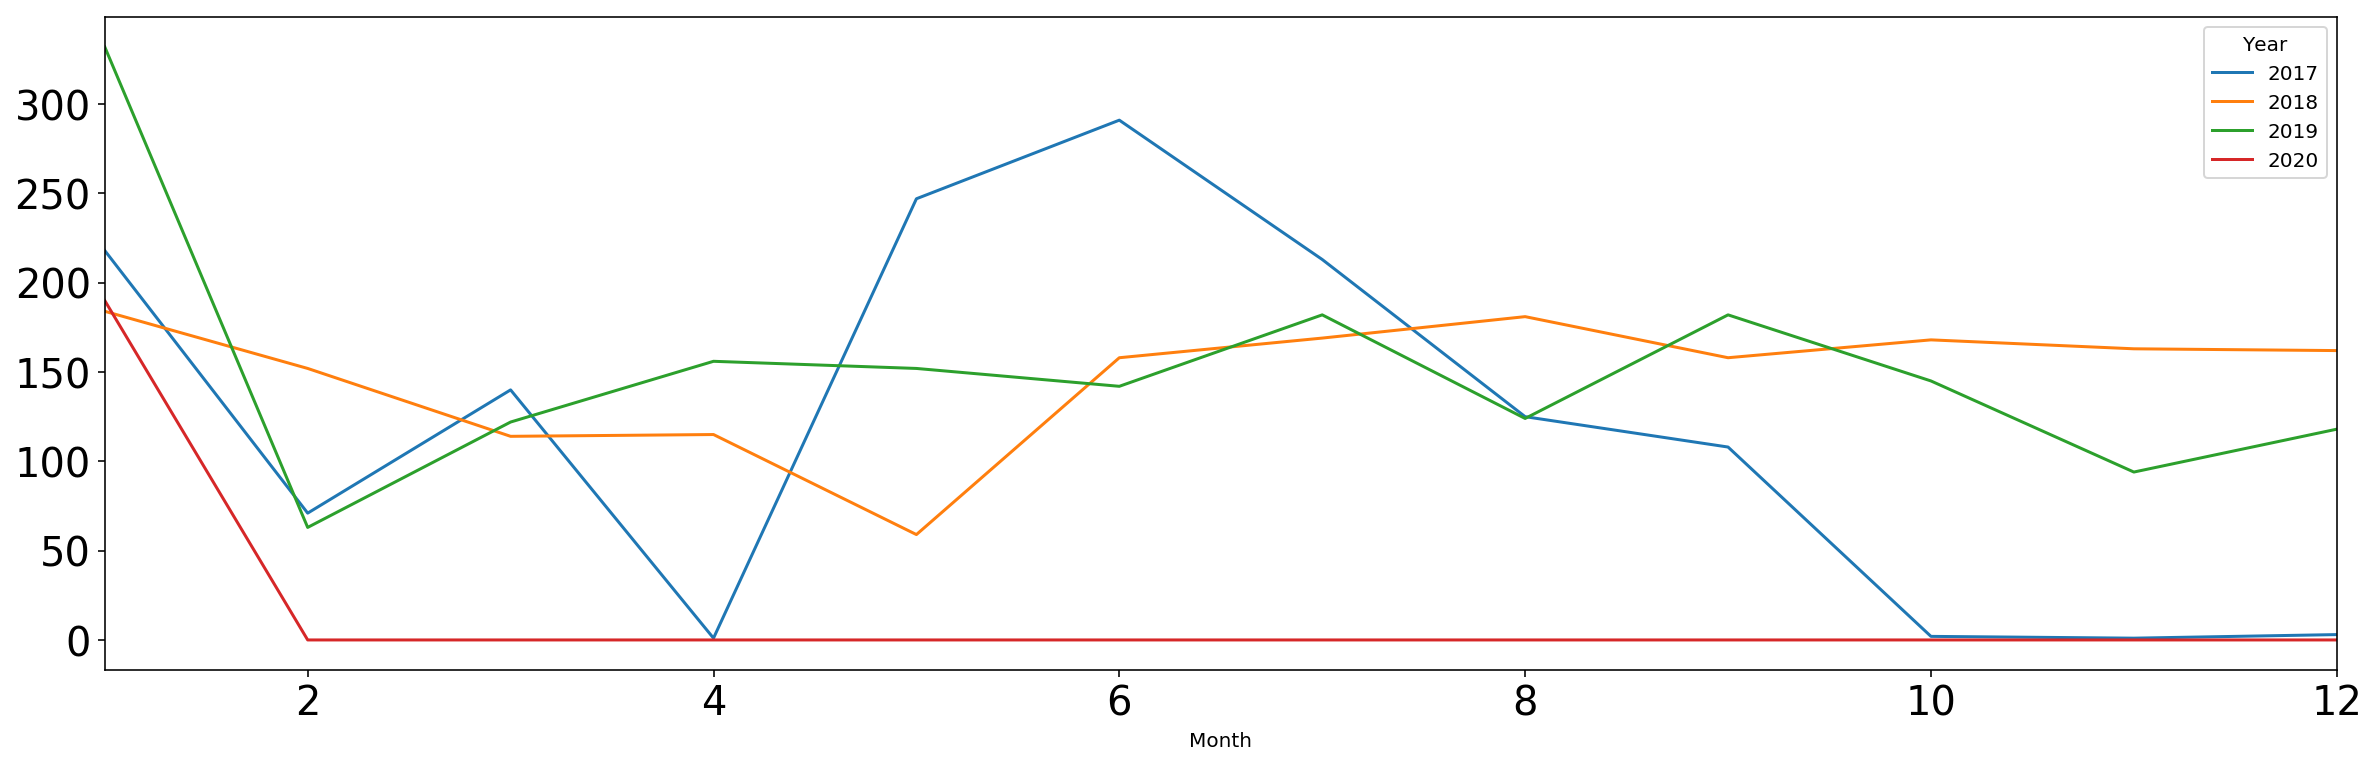

In [29]:
month_reg.plot(kind = 'line', legend='Year',figsize=(20,6),fontsize=20)
plt.show()

In [30]:
dictreg = pd.DataFrame(df1,columns = ['Year','Month','Dic','count'])
dictreg.head(5)

,Year,Month,Dic,count
0,2017,1,Tân Phú,1.0
1,2017,1,Phú Nhuận,1.0
2,2017,1,Hóc Môn,1.0
3,2017,1,Tân Phú,1.0
4,2017,1,Gò Vấp,1.0


In [31]:
dictreg['Dic'].unique()

array(['Tân Phú', 'Phú Nhuận', 'Hóc Môn', 'Gò Vấp', 'Tân Bình', 'Quận 1',
       'Quận 3', 'Quận 11', 'Củ Chi', 'Quận 10', 'Trảng Bàng', 'Tân BÌnh'],
      dtype=object)

In [50]:
dictreg['Dic'] = dictreg['Dic'].replace(['Tân BÌnh'],'Tân Bình')
dictreg['Dic'].unique()

array(['Tân Phú', 'Phú Nhuận', 'Hóc Môn', 'Gò Vấp', 'Tân Bình', 'Quận 1',
       'Quận 3', 'Quận 11', 'Củ Chi', 'Quận 10', 'Trảng Bàng'],
      dtype=object)

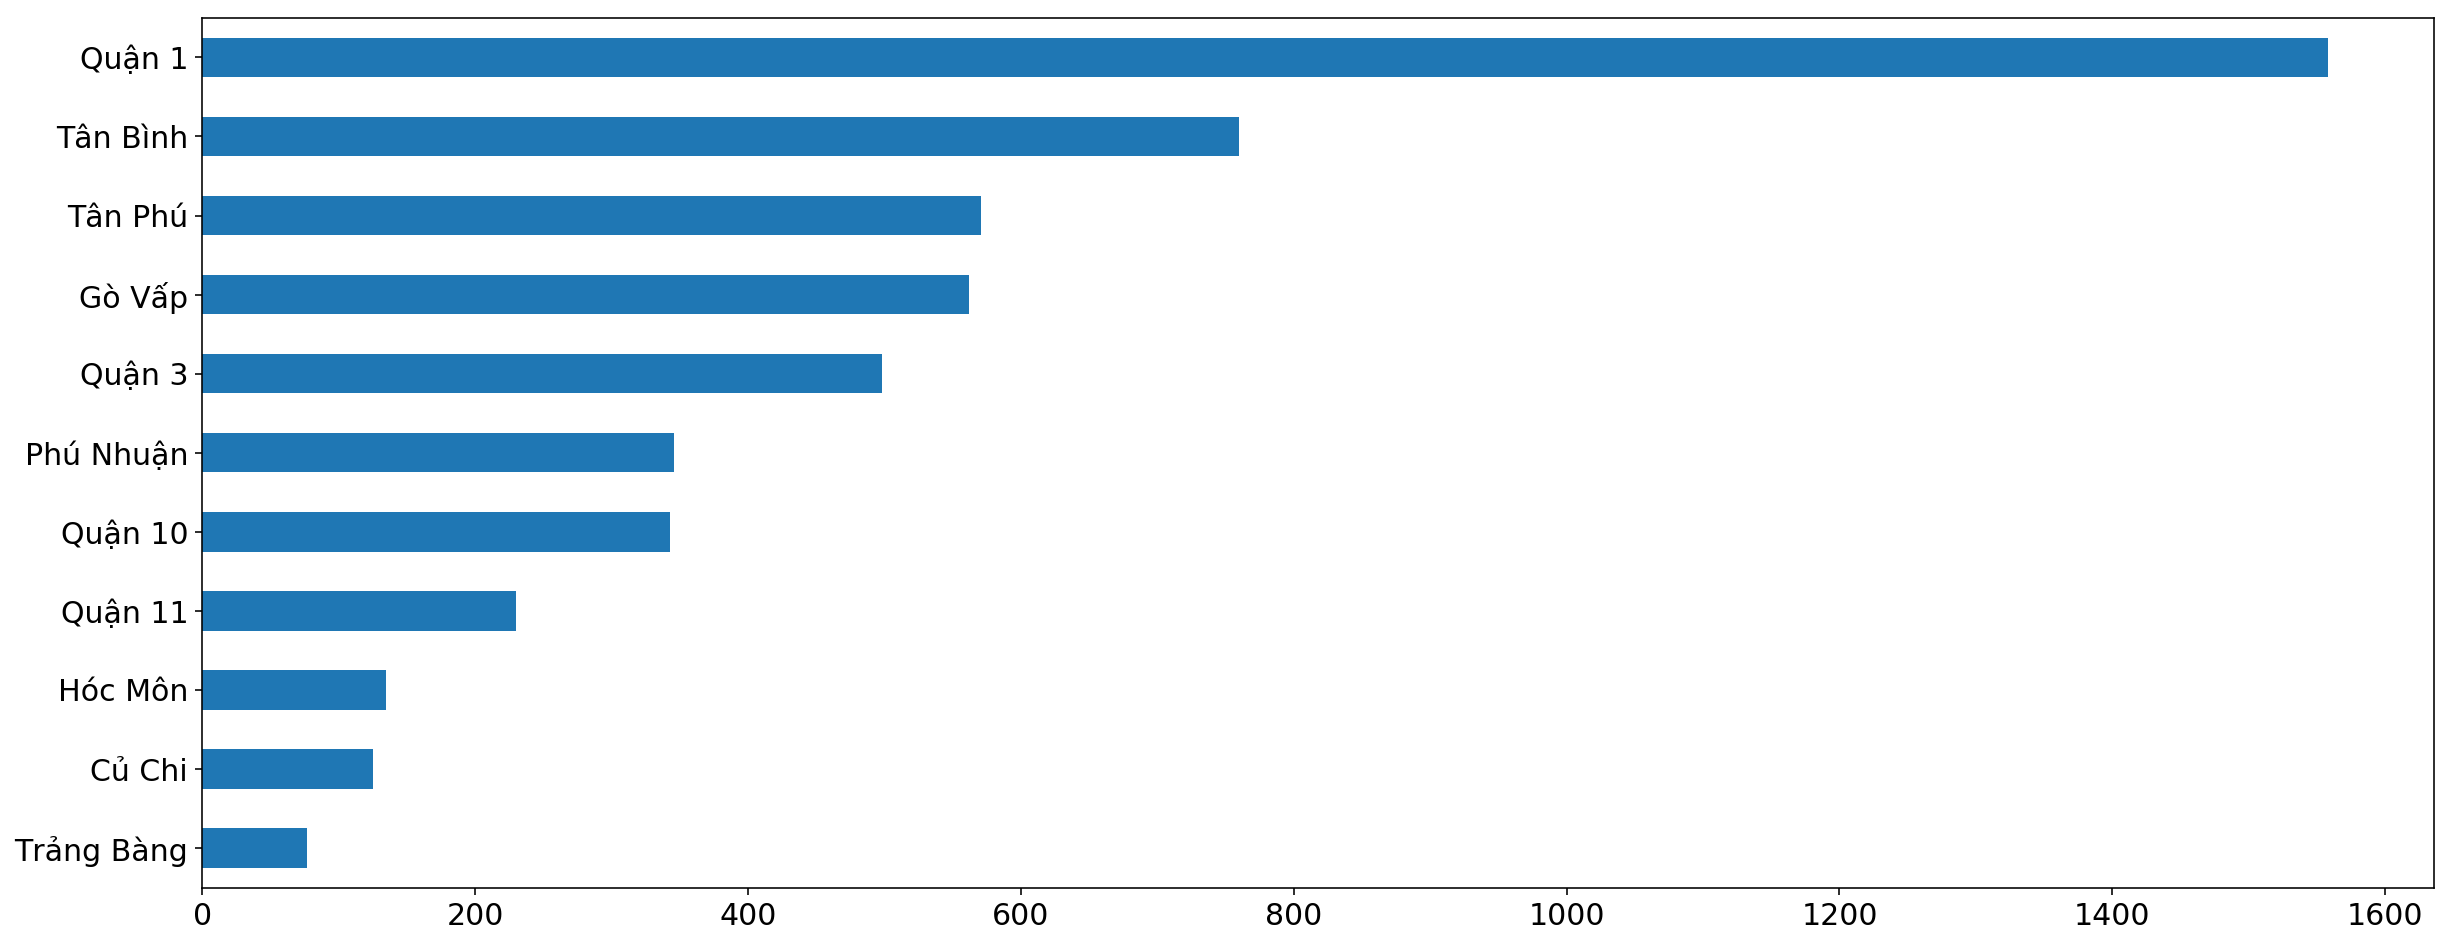

In [51]:
a = dictreg['Dic'].value_counts().sort_values()
a.plot(kind='barh',figsize=(20,8),fontsize=15)
plt.show()

Over 3 years from 2018 to 2020, Dictrict 1 still be the first
Now let check about the year that come by 

In [78]:
name = ['Luan','Ngan','Coca','Grandpa','Grandma']
age = [28,27,1,50,49]
gender = ['M','F','F','M','F']
fml = {'Name':name,'Age':age,'gender':gender}
fml1 = pd.DataFrame(data=fml).sort_values(by='Age',ascending=False).reset_index()
fml1.head(5)

,index,Age,Name,gender
0,3,50,Grandpa,M
1,4,49,Grandma,F
2,0,28,Luan,M
3,1,27,Ngan,F
4,2,1,Coca,F


In [84]:
for i in gender:
    gender1 = pd.DataFrame(data=i)
gender1

M
F
F
M
F
